<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.4
    Uninstalling yfinance-0.2.4:
      Successfully uninstalled yfinance-0.2.4

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████

In [4]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [6]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [8]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = "TSLA"

# Create a Ticker object
tesla_stock = yf.Ticker(ticker_symbol)

# Get historical data
historical_data = tesla_stock.history(period="1d", interval="1m")

# Display the historical data
print(historical_data)


                                 Open        High         Low       Close  \
Datetime                                                                    
2023-12-11 09:30:00-05:00  242.740005  243.440994  241.899994  242.115005   
2023-12-11 09:31:00-05:00  242.199997  242.799896  241.699997  241.948395   
2023-12-11 09:32:00-05:00  241.925003  242.330002  241.309998  241.459900   
2023-12-11 09:33:00-05:00  241.460007  242.070007  241.350601  242.070007   
2023-12-11 09:34:00-05:00  242.011902  242.380005  241.030106  241.496796   
...                               ...         ...         ...         ...   
2023-12-11 15:56:00-05:00  239.690002  239.789993  239.610001  239.750000   
2023-12-11 15:57:00-05:00  239.750000  239.940002  239.710007  239.852493   
2023-12-11 15:58:00-05:00  239.852707  239.989899  239.300003  239.809998   
2023-12-11 15:59:00-05:00  239.804993  239.899994  239.470001  239.649994   
2023-12-11 16:00:00-05:00  239.740005  239.740005  239.740005  239.740005   

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [10]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker_symbol = "TSLA"

# Create a Ticker object
tesla_stock = yf.Ticker(ticker_symbol)

# Get historical data for the maximum available time
tesla_data = tesla_stock.history(period="max")

# Display the historical data
print(tesla_data)

                  Open        High         Low       Close     Volume  \
Date                                                                    
2010-06-29    1.266667    1.666667    1.169333    1.592667  281494500   
2010-06-30    1.719333    2.028000    1.553333    1.588667  257806500   
2010-07-01    1.666667    1.728000    1.351333    1.464000  123282000   
2010-07-02    1.533333    1.540000    1.247333    1.280000   77097000   
2010-07-06    1.333333    1.333333    1.055333    1.074000  103003500   
...                ...         ...         ...         ...        ...   
2023-12-05  233.869995  246.660004  233.699997  238.720001  137971100   
2023-12-06  242.919998  246.570007  239.169998  239.369995  126436200   
2023-12-07  241.550003  244.080002  236.979996  242.639999  107142300   
2023-12-08  240.270004  245.270004  239.270004  243.839996  102980100   
2023-12-11  242.740005  243.440002  237.449997  239.740005   97758900   

            Dividends  Stock Splits  
Date        

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [11]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker_symbol = "TSLA"

# Create a Ticker object
tesla_stock = yf.Ticker(ticker_symbol)

# Get historical data for the maximum available time
tesla_data = tesla_stock.history(period="max")

# Reset the index in-place
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [12]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the HTML content as a variable
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [13]:
from bs4 import BeautifulSoup

# Assuming html_data contains the HTML content
# If not, replace it with the actual HTML content

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can work with the parsed HTML content using BeautifulSoup functions
# For example, print the title of the webpage
title = soup.title
print(f"Webpage Title: {title.text}")


Webpage Title: Tesla Revenue 2010-2022 | TSLA | MacroTrends


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [15]:
import pandas as pd

# Assuming html_data contains the HTML content
# If not, replace it with the actual HTML content

# Use the read_html function to extract tables from HTML
tables = pd.read_html(html_data, flavor='bs4')

# Assuming the desired table is the first one
tesla_revenue = tables[0]

# Display the DataFrame
print(tesla_revenue)


    Tesla Annual Revenue(Millions of US $)  \
0                                     2021   
1                                     2020   
2                                     2019   
3                                     2018   
4                                     2017   
5                                     2016   
6                                     2015   
7                                     2014   
8                                     2013   
9                                     2012   
10                                    2011   
11                                    2010   
12                                    2009   

   Tesla Annual Revenue(Millions of US $).1  
0                                   $53,823  
1                                   $31,536  
2                                   $24,578  
3                                   $21,461  
4                                   $11,759  
5                                    $7,000  
6                                

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [29]:
import pandas as pd

# Assuming html_data contains the HTML content
# If not, replace it with the actual HTML content

# Use the read_html function to extract tables from HTML
tables = pd.read_html(html_data, flavor='bs4')

# Assuming the desired table is the first one
tesla_revenue = tables[0]

# Print the column names to see what columns are available
print(tesla_revenue.columns)

# Remove commas and dollar signs from the second column (2021, 2020, etc.)
column_name = tesla_revenue.columns[1]
tesla_revenue[column_name] = tesla_revenue[column_name].str.replace(',|\$', '')

# Display the DataFrame
print(tesla_revenue)


Index(['Tesla Annual Revenue(Millions of US $)', 'Tesla Annual Revenue(Millions of US $).1'], dtype='object')
    Tesla Annual Revenue(Millions of US $)  \
0                                     2021   
1                                     2020   
2                                     2019   
3                                     2018   
4                                     2017   
5                                     2016   
6                                     2015   
7                                     2014   
8                                     2013   
9                                     2012   
10                                    2011   
11                                    2010   
12                                    2009   

   Tesla Annual Revenue(Millions of US $).1  
0                                     53823  
1                                     31536  
2                                     24578  
3                                     21461  
4              

Execute the following lines to remove an null or empty strings in the Revenue column.


In [31]:
import pandas as pd

# Assuming html_data contains the HTML content
# If not, replace it with the actual HTML content

# Use the read_html function to extract tables from HTML
tables = pd.read_html(html_data, flavor='bs4')

# Assuming the desired table is the first one
tesla_revenue = tables[0]

# Print the column names to see what columns are available
print(tesla_revenue.columns)

# Remove commas and dollar signs from the second column (2021, 2020, etc.)
column_name = tesla_revenue.columns[1]
tesla_revenue[column_name] = tesla_revenue[column_name].str.replace(',|\$', '')

# Remove null or empty strings in the 'Revenue' column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue[column_name] != ""]

# Display the DataFrame
print(tesla_revenue)


Index(['Tesla Annual Revenue(Millions of US $)', 'Tesla Annual Revenue(Millions of US $).1'], dtype='object')
    Tesla Annual Revenue(Millions of US $)  \
0                                     2021   
1                                     2020   
2                                     2019   
3                                     2018   
4                                     2017   
5                                     2016   
6                                     2015   
7                                     2014   
8                                     2013   
9                                     2012   
10                                    2011   
11                                    2010   
12                                    2009   

   Tesla Annual Revenue(Millions of US $).1  
0                                     53823  
1                                     31536  
2                                     24578  
3                                     21461  
4              

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [32]:
# Display the last 5 rows of the DataFrame
print(tesla_revenue.tail())


    Tesla Annual Revenue(Millions of US $)  \
8                                     2013   
9                                     2012   
10                                    2011   
11                                    2010   
12                                    2009   

   Tesla Annual Revenue(Millions of US $).1  
8                                      2013  
9                                       413  
10                                      204  
11                                      117  
12                                      112  


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [33]:
import yfinance as yf

# Create a ticker object for GameStop (ticker symbol: GME)
gme_ticker = yf.Ticker("GME")

# Extract historical stock data (adjust the period as needed)
gme_data = gme_ticker.history(period="1d")

# Display the stock data
print(gme_data)


             Open   High    Low  Close   Volume  Dividends  Stock Splits
Date                                                                    
2023-12-11  15.45  15.69  14.98  15.07  4937300          0             0


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [34]:
import yfinance as yf
import pandas as pd

# Create a ticker object for GameStop (ticker symbol: GME)
gme_ticker = yf.Ticker("GME")

# Extract historical stock data for the maximum available time
gme_data = gme_ticker.history(period="max")

# Display the stock data
print(gme_data)


                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2002-02-13   1.620128   1.693350   1.603296   1.691666  76216000        0.0   
2002-02-14   1.712707   1.716074   1.670626   1.683250  11021600        0.0   
2002-02-15   1.683250   1.687458   1.658002   1.674834   8389600        0.0   
2002-02-19   1.666418   1.666418   1.578047   1.607504   7410400        0.0   
2002-02-20   1.615920   1.662209   1.603296   1.662209   6892800        0.0   
...               ...        ...        ...        ...       ...        ...   
2023-12-05  16.469999  16.719999  14.870000  14.910000  14220100        0.0   
2023-12-06  15.360000  15.700000  14.640000  14.840000  12691300        0.0   
2023-12-07  13.710000  16.520000  13.560000  16.360001  19840700        0.0   
2023-12-08  15.830000  16.480000  15.470000  15.550000  10375400        0.0   
2023-12-11  15.450000  15.690000  14.980000  15.0700

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [35]:
import yfinance as yf
import pandas as pd

# Create a ticker object for GameStop (ticker symbol: GME)
gme_ticker = yf.Ticker("GME")

# Extract historical stock data for the maximum available time
gme_data = gme_ticker.history(period="max")

# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the stock data
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [36]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text of the response as html_data
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


Webpage downloaded successfully.


Parse the html data using `beautiful_soup`.


In [37]:
from bs4 import BeautifulSoup

# Assuming html_data contains the downloaded HTML content
# If not, replace it with the actual HTML content

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Now you can work with the BeautifulSoup object 'soup' to navigate and extract information from the HTML
# For example, you can find tables using soup.find_all('table')


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [38]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# Assuming html_data contains the downloaded HTML content
# If not, replace it with the actual HTML content

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Find the table with GameStop Revenue using BeautifulSoup
table = soup.find('table', {'class': 'table'})

# Use the read_html function to extract the table into a DataFrame
gme_revenue = pd.read_html(str(table), flavor='bs4')[0]

# Rename the columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Remove commas and dollar signs from the 'Revenue' column
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',|\$', '')

# Display the DataFrame
print(gme_revenue)


    Date Revenue
0   2020    6466
1   2019    8285
2   2018    8547
3   2017    7965
4   2016    9364
5   2015    9296
6   2014    9040
7   2013    8887
8   2012    9551
9   2011    9474
10  2010    9078
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [39]:
# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())


    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


KeyError: 'Date'

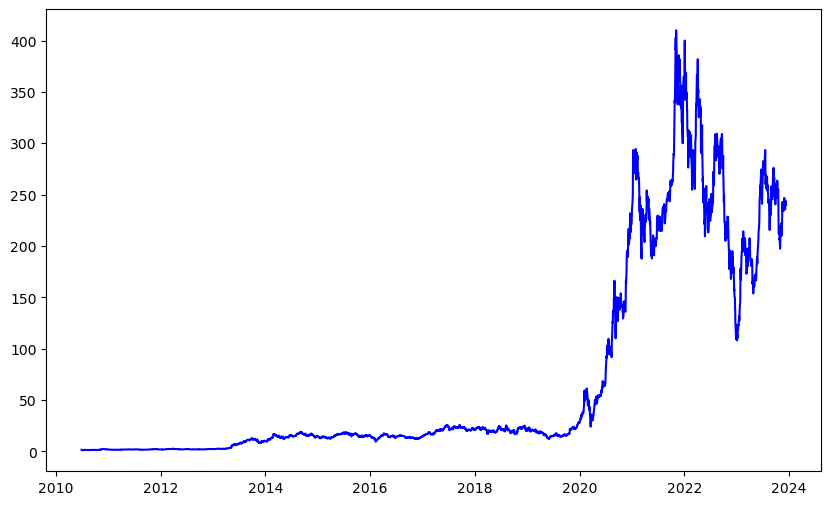

In [43]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name):
    # Assuming stock_data and revenue_data have columns 'Date' and 'Close'
    
    # Plotting stock data
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{stock_name} Stock Price', color='blue')

    # Plotting revenue data
    plt.bar(revenue_data['Date'], revenue_data['Revenue'].astype(float), label=f'{stock_name} Revenue', color='green', alpha=0.5)

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'{stock_name} Stock Data and Revenue')
    plt.legend()
    plt.show()

# Assuming tesla_data and tesla_revenue have columns 'Date' and 'Close'/'Revenue'
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


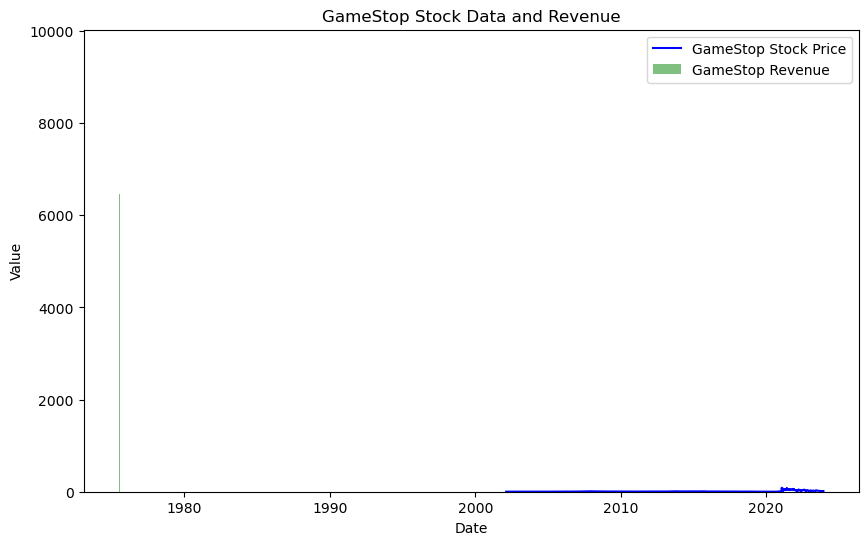

In [45]:
# Assuming 'Date' and 'Close' are present in gme_data
# Assuming 'Date' and 'Revenue' are present in gme_revenue
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
